# Clustering 
# https://github.com/annoviko/pyclustering

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

from pyclustering.cluster import cluster_visualizer
from pyclustering.cluster.cure import cure
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.cluster.xmeans import xmeans
from sklearn import datasets
from sklearn import cluster
from sklearn.preprocessing import StandardScaler

In [2]:
plt.style.use('ggplot')

# Generate datasets

In [3]:
n_samples = 1500

## noisy circles

In [4]:
noisy_circles = datasets.make_circles(n_samples = n_samples, factor = .5, noise = .05)

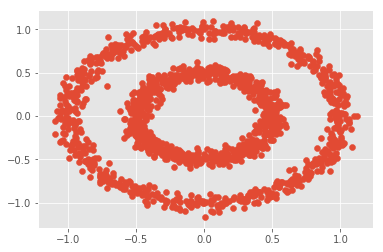

In [5]:
plt.scatter(noisy_circles[0][:, 0], noisy_circles[0][:, 1])

## noisy moon

In [6]:
noisy_moons = datasets.make_moons(n_samples = n_samples, noise = .05)

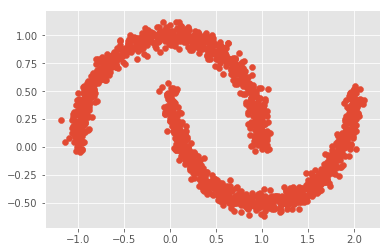

In [7]:
plt.scatter(noisy_moons[0][:, 0], noisy_moons[0][:, 1])

## blobs

In [8]:
blobs = datasets.make_blobs(n_samples = n_samples, random_state = 42)

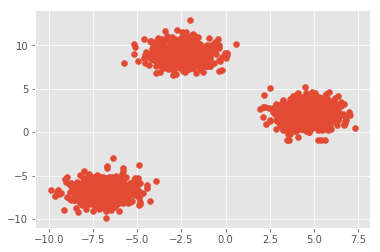

In [9]:
plt.scatter(blobs[0][:, 0], blobs[0][:, 1])

## varied

In [10]:
varied = datasets.make_blobs(n_samples = n_samples, 
                             cluster_std = [1.0, 2.5, 0.5], 
                             random_state = 42)

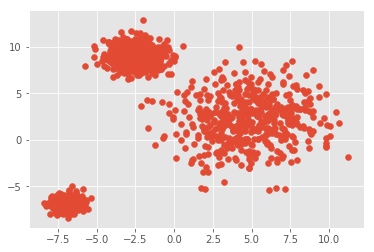

In [11]:
plt.scatter(varied[0][:, 0], varied[0][:, 1])

## no structure

In [12]:
no_structure = np.random.rand(1500, 2), None

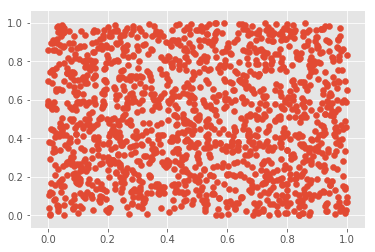

In [13]:
plt.scatter(no_structure[0][:, 0], no_structure[0][:, 1])

## Anisotropicly distributed data

In [14]:
X, y = datasets.make_blobs(n_samples = n_samples, random_state = 42)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

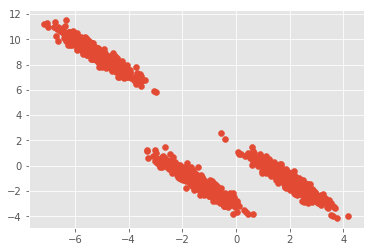

In [15]:
plt.scatter(aniso[0][:, 0], aniso[0][:, 1])

# KMeans

In [16]:
kmeans = cluster.KMeans(n_clusters = 2, 
                        init = 'k-means++', 
                        n_init = 20, 
                        max_iter = 500, 
                        tol = 0.00001,
                        random_state = 42)
kmeans.fit(noisy_circles[0])
clus = kmeans.labels_

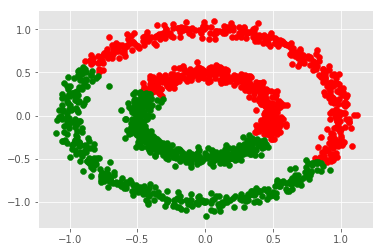

In [17]:
c = ['r', 'g', 'b']
for i, c in enumerate(c):
    idx = np.where(clus == i)[0]
    plt.scatter(noisy_circles[0][idx, 0], noisy_circles[0][idx, 1], c = c)

In [18]:
kmeans = cluster.KMeans(n_clusters = 2, 
                        init = 'k-means++', 
                        n_init = 20, 
                        max_iter = 500, 
                        tol = 0.00001,
                        random_state = 42)
kmeans.fit(noisy_moons[0])
clus = kmeans.labels_

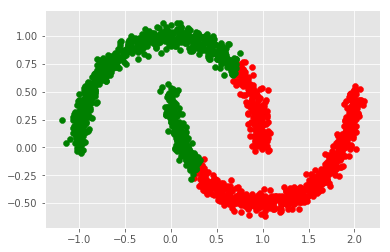

In [19]:
c = ['r', 'g', 'b']
for i, c in enumerate(c):
    idx = np.where(clus == i)[0]
    plt.scatter(noisy_moons[0][idx, 0], noisy_moons[0][idx, 1], c = c)

In [20]:
kmeans = cluster.KMeans(n_clusters = 3, 
                        init = 'k-means++', 
                        n_init = 20, 
                        max_iter = 500, 
                        tol = 0.00001,
                        random_state = 42)
kmeans.fit(blobs[0])
clus = kmeans.labels_

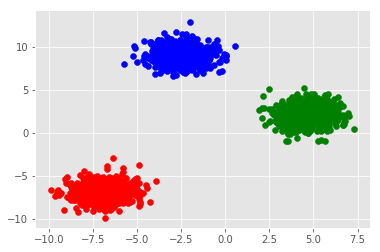

In [21]:
c = ['r', 'g', 'b']
for i, c in enumerate(c):
    idx = np.where(clus == i)[0]
    plt.scatter(blobs[0][idx, 0], blobs[0][idx, 1], c = c)

In [22]:
kmeans = cluster.KMeans(n_clusters = 3, 
                        init = 'k-means++', 
                        n_init = 20, 
                        max_iter = 500, 
                        tol = 0.00001,
                        random_state = 42)
kmeans.fit(varied[0])
clus = kmeans.labels_

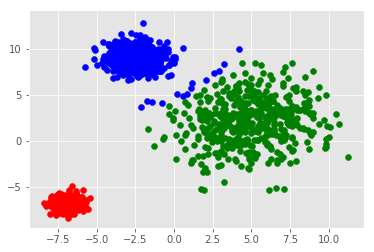

In [23]:
c = ['r', 'g', 'b']
for i, c in enumerate(c):
    idx = np.where(clus == i)[0]
    plt.scatter(varied[0][idx, 0], varied[0][idx, 1], c = c)

In [24]:
kmeans = cluster.KMeans(n_clusters = 3, 
                        init = 'k-means++', 
                        n_init = 20, 
                        max_iter = 500, 
                        tol = 0.00001,
                        random_state = 42)
kmeans.fit(no_structure[0])
clus = kmeans.labels_

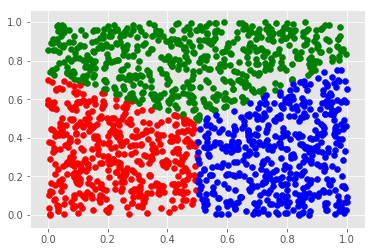

In [25]:
c = ['r', 'g', 'b']
for i, c in enumerate(c):
    idx = np.where(clus == i)[0]
    plt.scatter(no_structure[0][idx, 0], no_structure[0][idx, 1], c = c)

In [26]:
kmeans = cluster.KMeans(n_clusters = 3, 
                        init = 'k-means++', 
                        n_init = 20, 
                        max_iter = 500, 
                        tol = 0.00001,
                        random_state = 42)
kmeans.fit(aniso[0])
clus = kmeans.labels_

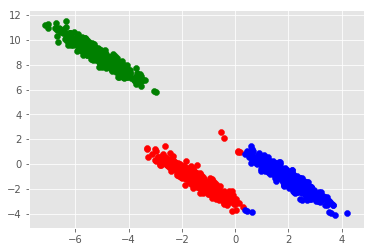

In [27]:
c = ['r', 'g', 'b']
for i, c in enumerate(c):
    idx = np.where(clus == i)[0]
    plt.scatter(aniso[0][idx, 0], aniso[0][idx, 1], c = c)

# cure

In [28]:
# Allocate three clusters:
cure_instance = cure(noisy_circles[0], 2)
cure_instance.process()
clusters = cure_instance.get_clusters()

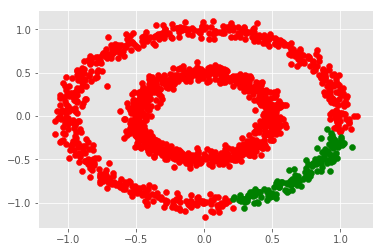

In [29]:
clus = np.zeros(1500)
clus[clusters[1]] = 1
c = ['r', 'g', 'b']
for i, c in enumerate(c):
    idx = np.where(clus == i)[0]
    plt.scatter(noisy_circles[0][idx, 0], noisy_circles[0][idx, 1], c = c)

In [30]:
# Allocate three clusters:
cure_instance = cure(noisy_moons[0], 2)
cure_instance.process()
clusters = cure_instance.get_clusters()

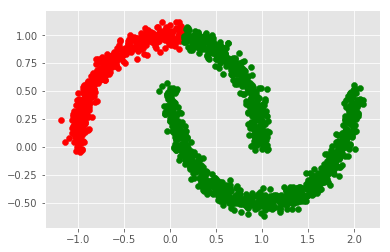

In [31]:
clus = np.zeros(1500)
clus[clusters[1]] = 1
c = ['r', 'g', 'b']
for i, c in enumerate(c):
    idx = np.where(clus == i)[0]
    plt.scatter(noisy_moons[0][idx, 0], noisy_moons[0][idx, 1], c = c)

In [32]:
# Allocate three clusters:
cure_instance = cure(blobs[0], 3)
cure_instance.process()
clusters = cure_instance.get_clusters()

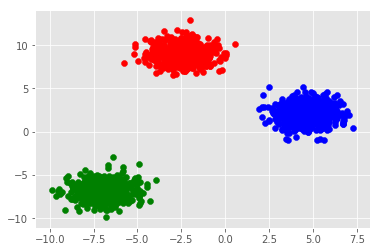

In [33]:
clus = np.zeros(1500)
clus[clusters[1]] = 1
clus[clusters[2]] = 2
c = ['r', 'g', 'b']
for i, c in enumerate(c):
    idx = np.where(clus == i)[0]
    plt.scatter(blobs[0][idx, 0], blobs[0][idx, 1], c = c)

In [34]:
# Allocate three clusters:
cure_instance = cure(varied[0], 3)
cure_instance.process()
clusters = cure_instance.get_clusters()

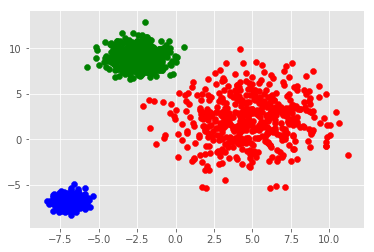

In [35]:
clus = np.zeros(1500)
clus[clusters[1]] = 1
clus[clusters[2]] = 2
c = ['r', 'g', 'b']
for i, c in enumerate(c):
    idx = np.where(clus == i)[0]
    plt.scatter(varied[0][idx, 0], varied[0][idx, 1], c = c)

In [36]:
# Allocate three clusters:
cure_instance = cure(no_structure[0], 3)
cure_instance.process()
clusters = cure_instance.get_clusters()

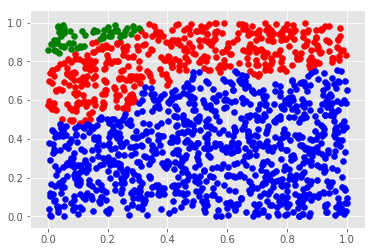

In [37]:
clus = np.zeros(1500)
clus[clusters[1]] = 1
clus[clusters[2]] = 2
c = ['r', 'g', 'b']
for i, c in enumerate(c):
    idx = np.where(clus == i)[0]
    plt.scatter(no_structure[0][idx, 0], no_structure[0][idx, 1], c = c)

In [38]:
# Allocate three clusters:
cure_instance = cure(aniso[0], 3)
cure_instance.process()
clusters = cure_instance.get_clusters()

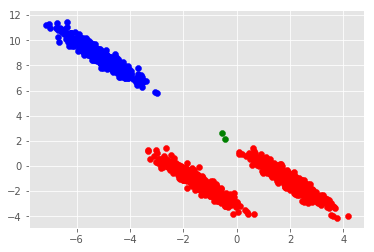

In [39]:
clus = np.zeros(1500)
clus[clusters[1]] = 1
clus[clusters[2]] = 2
c = ['r', 'g', 'b']
for i, c in enumerate(c):
    idx = np.where(clus == i)[0]
    plt.scatter(aniso[0][idx, 0], aniso[0][idx, 1], c = c)

# KMedoids

In [40]:
initial_centers = kmeans_plusplus_initializer(noisy_circles[0], 2).initialize()
initial_medoids = [300, 300]
kmedoids_instance = kmedoids(noisy_circles[0], initial_medoids)
kmedoids_instance.process()
clusters = kmedoids_instance.get_clusters()

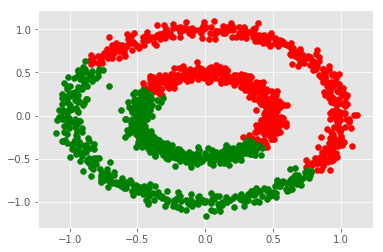

In [41]:
clus = np.zeros(1500)
clus[clusters[1]] = 1
c = ['r', 'g', 'b']
for i, c in enumerate(c):
    idx = np.where(clus == i)[0]
    plt.scatter(noisy_circles[0][idx, 0], noisy_circles[0][idx, 1], c = c)

In [42]:
initial_centers = kmeans_plusplus_initializer(noisy_moons[0], 2).initialize()
initial_medoids = [300, 300]
kmedoids_instance = kmedoids(noisy_moons[0], initial_medoids)
kmedoids_instance.process()
clusters = kmedoids_instance.get_clusters()

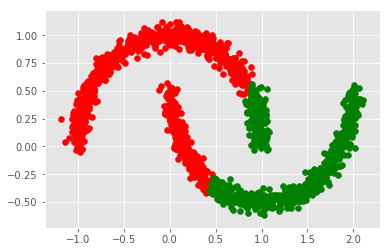

In [43]:
clus = np.zeros(1500)
clus[clusters[1]] = 1
c = ['r', 'g', 'b']
for i, c in enumerate(c):
    idx = np.where(clus == i)[0]
    plt.scatter(noisy_moons[0][idx, 0], noisy_moons[0][idx, 1], c = c)

In [44]:
initial_centers = kmeans_plusplus_initializer(blobs[0], 3).initialize()
initial_medoids = [200, 200, 200]
kmedoids_instance = kmedoids(blobs[0], initial_medoids)
kmedoids_instance.process()
clusters = kmedoids_instance.get_clusters()

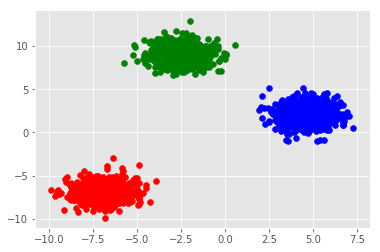

In [45]:
clus = np.zeros(1500)
clus[clusters[1]] = 1
clus[clusters[2]] = 2
c = ['r', 'g', 'b']
for i, c in enumerate(c):
    idx = np.where(clus == i)[0]
    plt.scatter(blobs[0][idx, 0], blobs[0][idx, 1], c = c)

In [46]:
initial_centers = kmeans_plusplus_initializer(varied[0], 3).initialize()
initial_medoids = [200, 200, 200]
kmedoids_instance = kmedoids(varied[0], initial_medoids)
kmedoids_instance.process()
clusters = kmedoids_instance.get_clusters()

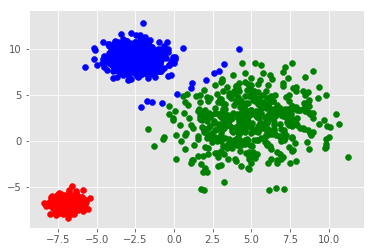

In [47]:
clus = np.zeros(1500)
clus[clusters[1]] = 1
clus[clusters[2]] = 2
c = ['r', 'g', 'b']
for i, c in enumerate(c):
    idx = np.where(clus == i)[0]
    plt.scatter(varied[0][idx, 0], varied[0][idx, 1], c = c)

In [48]:
initial_centers = kmeans_plusplus_initializer(no_structure[0], 3).initialize()
initial_medoids = [200, 200, 200]
kmedoids_instance = kmedoids(no_structure[0], initial_medoids)
kmedoids_instance.process()
clusters = kmedoids_instance.get_clusters()

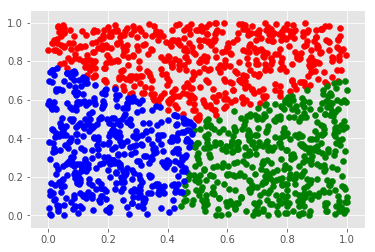

In [49]:
clus = np.zeros(1500)
clus[clusters[1]] = 1
clus[clusters[2]] = 2
c = ['r', 'g', 'b']
for i, c in enumerate(c):
    idx = np.where(clus == i)[0]
    plt.scatter(no_structure[0][idx, 0], no_structure[0][idx, 1], c = c)

In [50]:
initial_centers = kmeans_plusplus_initializer(aniso[0], 3).initialize()
initial_medoids = [200, 200, 200]
kmedoids_instance = kmedoids(aniso[0], initial_medoids)
kmedoids_instance.process()
clusters = kmedoids_instance.get_clusters()

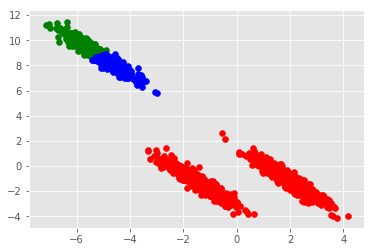

In [51]:
clus = np.zeros(1500)
clus[clusters[1]] = 1
clus[clusters[2]] = 2
c = ['r', 'g', 'b']
for i, c in enumerate(c):
    idx = np.where(clus == i)[0]
    plt.scatter(aniso[0][idx, 0], aniso[0][idx, 1], c = c)

# XMeans

In [52]:
initial_centers = kmeans_plusplus_initializer(noisy_circles[0], 2).initialize()
xmeans_instance = xmeans(noisy_circles[0], initial_centers, ccore = True)
xmeans_instance.process()
clusters = xmeans_instance.get_clusters()

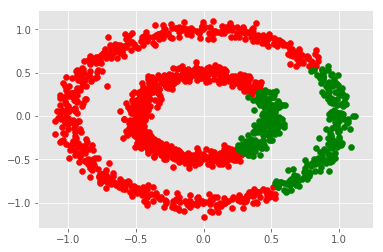

In [53]:
clus = np.zeros(1500)
clus[clusters[1]] = 1
c = ['r', 'g', 'b']
for i, c in enumerate(c):
    idx = np.where(clus == i)[0]
    plt.scatter(noisy_circles[0][idx, 0], noisy_circles[0][idx, 1], c = c)

In [54]:
initial_centers = kmeans_plusplus_initializer(noisy_moons[0], 2).initialize()
xmeans_instance = xmeans(noisy_moons[0], initial_centers, ccore = True)
xmeans_instance.process()
clusters = xmeans_instance.get_clusters()

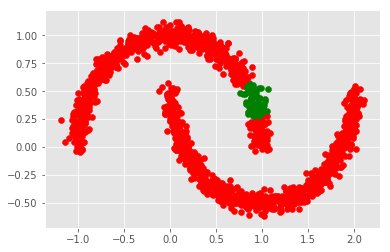

In [55]:
clus = np.zeros(1500)
clus[clusters[1]] = 1
c = ['r', 'g', 'b']
for i, c in enumerate(c):
    idx = np.where(clus == i)[0]
    plt.scatter(noisy_moons[0][idx, 0], noisy_moons[0][idx, 1], c = c)

In [56]:
initial_centers = kmeans_plusplus_initializer(blobs[0], 3).initialize()
xmeans_instance = xmeans(blobs[0], initial_centers, ccore = True)
xmeans_instance.process()
clusters = xmeans_instance.get_clusters()

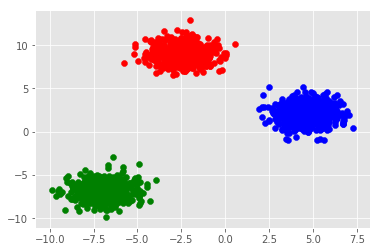

In [57]:
clus = np.zeros(1500)
clus[clusters[1]] = 1
clus[clusters[2]] = 2
c = ['r', 'g', 'b']
for i, c in enumerate(c):
    idx = np.where(clus == i)[0]
    plt.scatter(blobs[0][idx, 0], blobs[0][idx, 1], c = c)

In [58]:
initial_centers = kmeans_plusplus_initializer(varied[0], 3).initialize()
xmeans_instance = xmeans(varied[0], initial_centers, ccore = True)
xmeans_instance.process()
clusters = xmeans_instance.get_clusters()

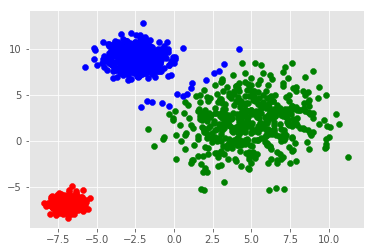

In [59]:
clus = np.zeros(1500)
clus[clusters[1]] = 1
clus[clusters[2]] = 2
c = ['r', 'g', 'b']
for i, c in enumerate(c):
    idx = np.where(clus == i)[0]
    plt.scatter(varied[0][idx, 0], varied[0][idx, 1], c = c)

In [60]:
initial_centers = kmeans_plusplus_initializer(no_structure[0], 3).initialize()
xmeans_instance = xmeans(no_structure[0], initial_centers, ccore = True)
xmeans_instance.process()
clusters = xmeans_instance.get_clusters()

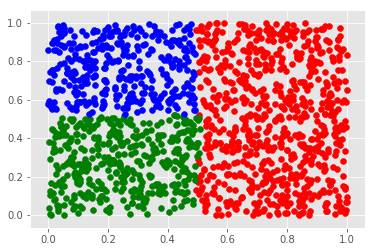

In [61]:
clus = np.zeros(1500)
clus[clusters[1]] = 1
clus[clusters[2]] = 2
c = ['r', 'g', 'b']
for i, c in enumerate(c):
    idx = np.where(clus == i)[0]
    plt.scatter(no_structure[0][idx, 0], no_structure[0][idx, 1], c = c)

In [62]:
initial_centers = kmeans_plusplus_initializer(aniso[0], 3).initialize()
xmeans_instance = xmeans(aniso[0], initial_centers, ccore = True)
xmeans_instance.process()
clusters = xmeans_instance.get_clusters()

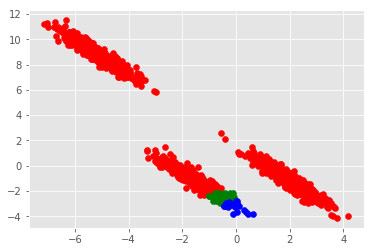

In [63]:
clus = np.zeros(1500)
clus[clusters[1]] = 1
clus[clusters[2]] = 2
c = ['r', 'g', 'b']
for i, c in enumerate(c):
    idx = np.where(clus == i)[0]
    plt.scatter(aniso[0][idx, 0], aniso[0][idx, 1], c = c)